In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro 
from scipy.stats import levene

In [234]:
data = pd.read_csv('hmelq.csv') # read data to csv

In [235]:
data.shape # data iclude 3576 row and 13 columns

(3576, 13)

In [236]:
data.columns #column(feature) names in data

Index(['bad', 'loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc'],
      dtype='object')

In [237]:
#getting an overview of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 13 columns):
bad        3576 non-null int64
loan       3576 non-null int64
mortdue    3262 non-null float64
value      3512 non-null float64
reason     3429 non-null object
job        3409 non-null object
yoj        3264 non-null float64
derog      3149 non-null float64
delinq     3225 non-null float64
clage      3397 non-null float64
ninq       3273 non-null float64
clno       3443 non-null float64
debtinc    2809 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 363.3+ KB


Burada datamızda bulunan verilerin typelarını görebiliyoruz. Ayrıca datamızda eksik veriler olduğu anlaşılıyor daha detaylı olarak eksik veri kontrolü yapalım.

In [238]:
# checking for missing values
print("Are there missing values? {}".format(data.isnull().any().any()))
#missing value control in features
data.isnull().sum()

Are there missing values? True


bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

Datamızda eksik veriler var bunları temizleyelim ve datamızın ilk 10 satırına bakalım.

In [239]:
#dropping rows that have missing data
data.dropna(axis=0, how='any', inplace=True)

In [240]:
data.shape #understading data

(2018, 13)

In [241]:
data.head(10) #peek at the data

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108
158,0,23900,140328.0,183533.0,HomeImp,Mgr,8.0,0.0,0.0,322.79,0.0,17.0,45.413
159,0,19700,70709.0,97394.0,DebtCon,Mgr,0.0,0.0,0.0,94.86,0.0,17.0,25.557
160,0,17300,79412.0,114906.0,DebtCon,Mgr,17.0,0.0,0.0,247.36,4.0,30.0,36.536
161,0,11700,78157.0,103016.0,DebtCon,Mgr,1.0,0.0,0.0,69.81,2.0,24.0,38.448
162,0,25300,51261.0,87025.0,DebtCon,Mgr,4.0,0.0,0.0,249.84,2.0,25.0,31.659


In [242]:
data.describe().T #summary istatistic

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [243]:
#grouping by bad
data_bad=data['bad'].value_counts()
data_bad.head()

0    1840
1     178
Name: bad, dtype: int64

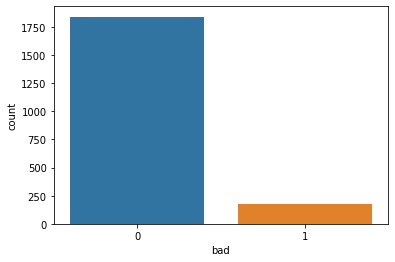

In [244]:
sns.countplot(data.bad)

Aslında hedef değişkenimiz biraz dengesiz kredisini ödemiş olanlar çok daha fazla.

In [245]:
data['reason'].unique() 
#reason kolonundan unique olan değerlere bakalım önce, reason kolonunun nominal bir değişken olduğunu görebiliyoruz

array(['DebtCon', 'HomeImp'], dtype=object)

In [246]:
data.loc[data['bad'] == 1, 'status'] = 'default'
data.loc[data['bad'] == 0, 'status'] = 'paid'

reason kolonuna göre bad kolonunu gruplayarak kredisini ödemiş ve ödememiş olan kişilerin yüzdelerine bakalım.

In [247]:
g = data.groupby('reason')
g['status'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

Aynı işlemi job kolonuna da yapalım, meslekler değiştikçe ödeme oranları değişebilir.

In [248]:
g = data.groupby('job')
g['status'].value_counts(normalize=True).to_frame().style.format("{:.1%}")

Ofis çalışanı ve profesyonel yöneticiler kredilerini ödeyebilme olasılığına sahipken satış ve serbest meslek sahiplerinin kredilerini ödeyememe olasılıkları en yüksek olanlardır yorumunu yapabiliriz.

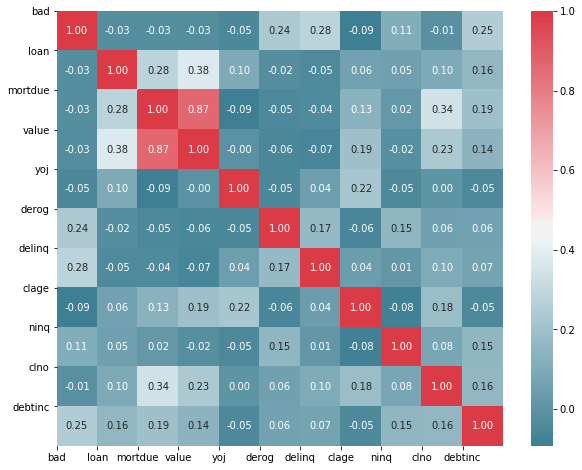

In [249]:
#Create Correlation matrix
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,8))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

mortdue ve value arasında yüksek bir korelasyon görülmekte. Mevcut mülkün değeri ne kadar büyükse ipoteğe bağlı tutar da o kadar yüksek olur yorumunu yapabiliriz.

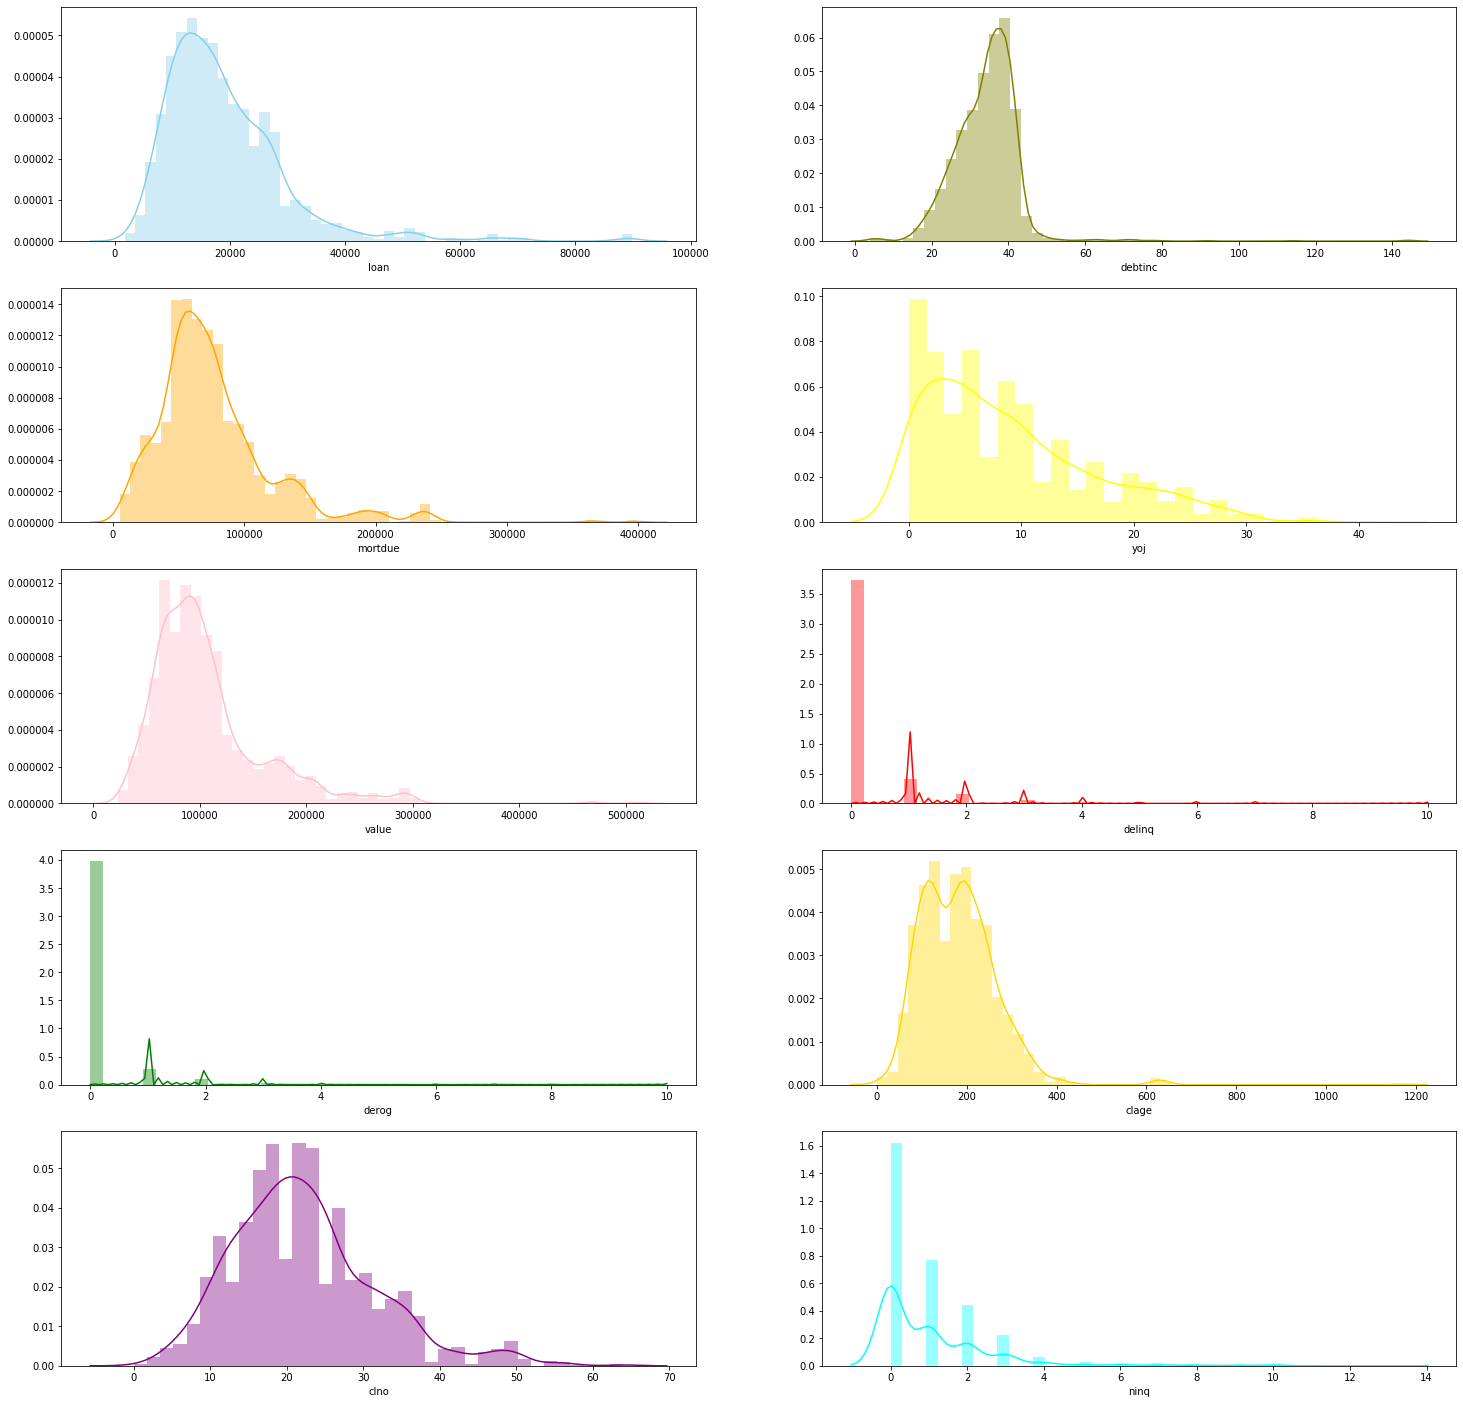

In [250]:
# visualizing numeric variables using seaborn
f, axes = plt.subplots(5, 2, figsize=(25,25))
sns.distplot( data["loan"] , color="skyblue", ax=axes[0, 0])
sns.distplot( data["debtinc"] , color="olive", ax=axes[0, 1])
sns.distplot( data["mortdue"] , color="orange", ax=axes[1, 0])
sns.distplot( data["yoj"] , color="yellow", ax=axes[1, 1])
sns.distplot( data["value"] , color="pink", ax=axes[2, 0])
sns.distplot( data["delinq"] , color="red", ax=axes[2, 1])
sns.distplot( data["derog"] , color="green", ax=axes[3, 0])
sns.distplot( data["clage"] , color="gold", ax=axes[3, 1])
sns.distplot( data["clno"] , color="purple", ax=axes[4, 0])
sns.distplot( data["ninq"] , color="cyan", ax=axes[4, 1])

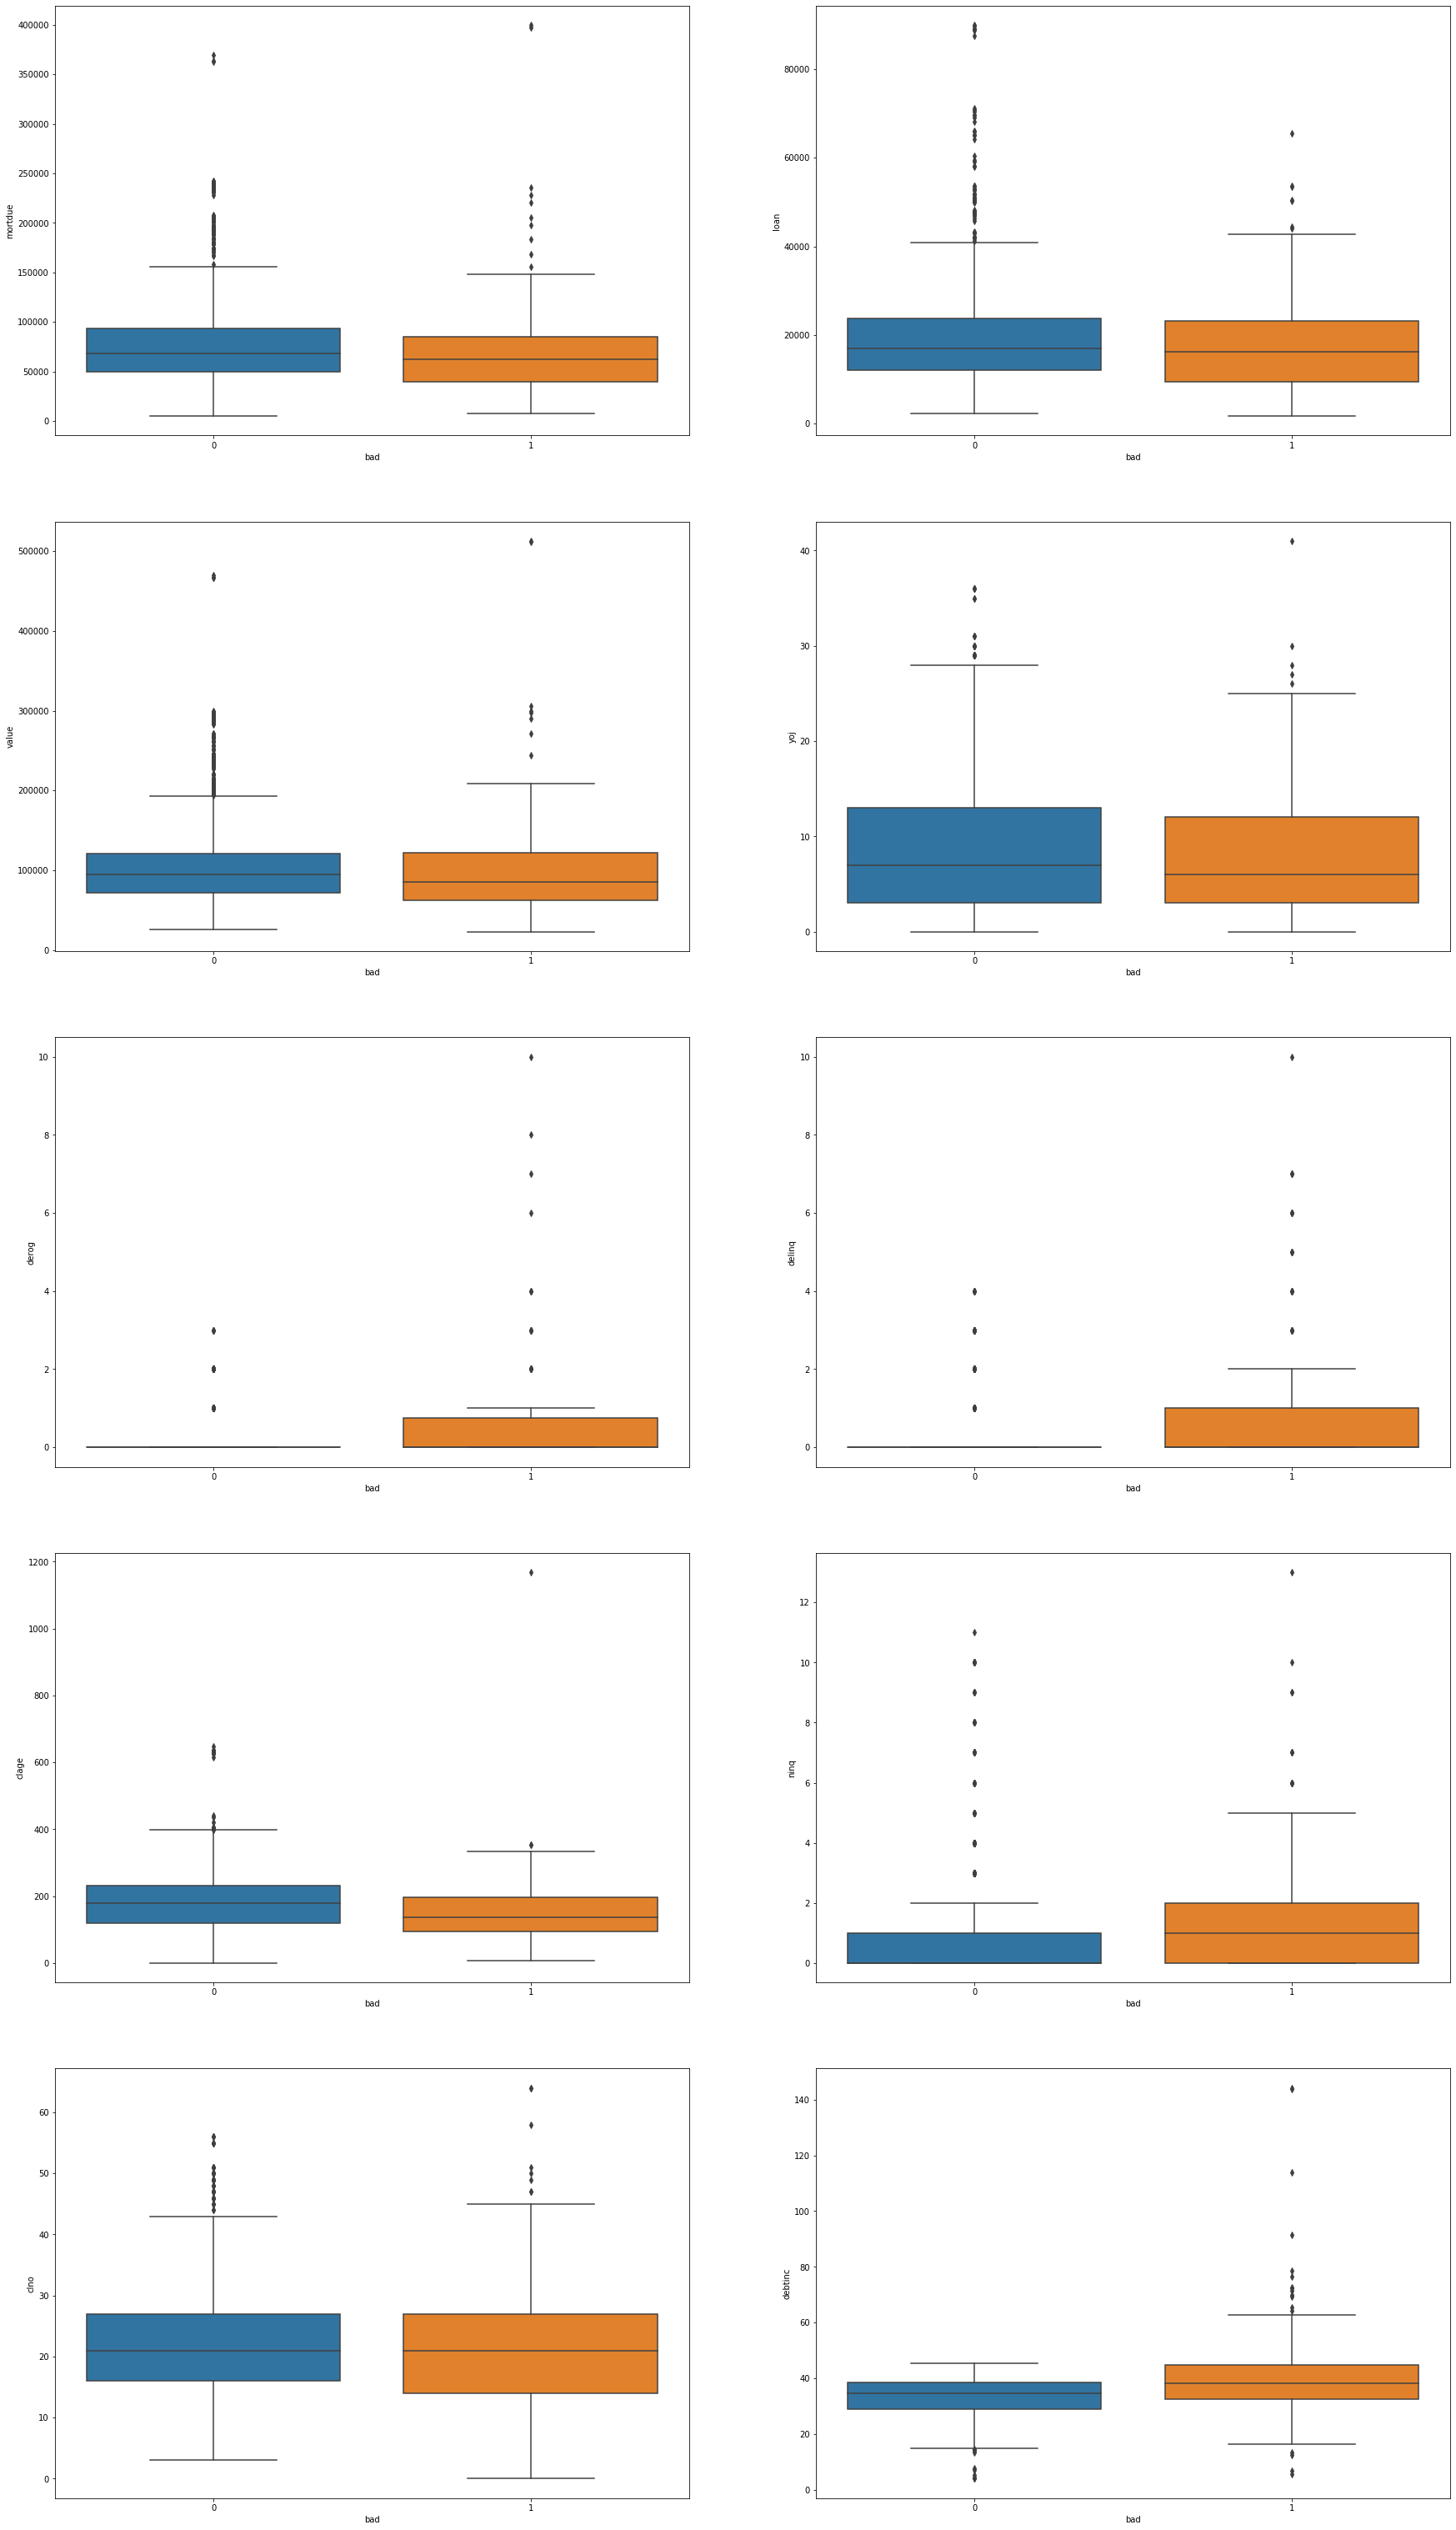

In [251]:
# visualizing numeric variables using seaborn
f, axes = plt.subplots(5, 2, figsize=(30,55))
sns.boxplot( x='bad', y='mortdue', data=data, ax=axes[0, 0])
sns.boxplot( x='bad', y='loan', data=data, ax=axes[0, 1])
sns.boxplot( x='bad', y='value', data=data, ax=axes[1, 0])
sns.boxplot( x='bad', y='yoj', data=data, ax=axes[1, 1])
sns.boxplot( x='bad', y='derog', data=data, ax=axes[2, 0])
sns.boxplot( x='bad', y='delinq', data=data, ax=axes[2, 1])
sns.boxplot( x='bad', y='clage', data=data, ax=axes[3, 0])
sns.boxplot( x='bad', y='ninq', data=data, ax=axes[3, 1])
sns.boxplot( x='bad', y='clno', data=data, ax=axes[4, 0])
sns.boxplot( x='bad', y='debtinc', data=data, ax=axes[4, 1])

Boxplota göre derog, delinq,ninq ve debtinc için şüpheleniyorum.

Boxplot a baktıktan sonra bad kolonuna göre hangi kolonlar arasında anlamlı bir fark olduğunu bulmak için test yapmaya başlayalım.

Ttestlerden önce kredisini ödeyen ve ödemeyen olarak iki farklı dataframe yapıp istatistik özetlerine bakıyorum.

In [252]:
data_paid = data[data['bad']==0].drop('bad', axis=1)
data_paid.describe().style.format("{:.2f}")

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,1840.00,1840.00,1840.00,1840.00,1840.00,1840.00,1840.00,1840.00,1840.00,1840.00
mean,19097.93,76684.21,107425.38,9.12,0.11,0.20,183.03,0.98,22.30,33.45
std,10726.01,43329.96,52344.17,7.62,0.39,0.57,81.60,1.49,9.22,6.57
min,2300.00,5076.00,26140.00,0.00,0.00,0.00,0.49,0.00,3.00,4.03
25%,12100.00,50126.25,72218.75,3.00,0.00,0.00,120.43,0.00,16.00,29.11
50%,16900.00,68046.00,94993.50,7.00,0.00,0.00,179.63,0.00,21.00,34.72
75%,23700.00,93130.25,120959.00,13.00,0.00,0.00,231.65,1.00,27.00,38.65
max,89900.00,369874.00,469748.00,36.00,3.00,4.00,648.33,11.00,56.00,45.41


In [253]:
data_deafult = data[data['bad']==1].drop('bad', axis=1)
data_deafult.describe().style.format("{:.2f}")

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,18103.93,72748.28,101460.55,7.76,0.59,0.98,156.00,1.60,21.88,40.92
std,11190.44,54963.44,69009.07,6.92,1.42,1.78,106.58,2.22,11.64,17.65
min,1700.00,7750.00,23031.00,0.00,0.00,0.00,8.06,0.00,0.00,5.76
25%,9350.00,39380.50,61835.25,3.00,0.00,0.00,95.03,0.00,14.00,32.59
50%,16200.00,61951.50,84922.00,6.00,0.00,0.00,136.13,1.00,21.00,38.20
75%,23150.00,85215.75,122184.75,12.00,0.75,1.00,196.40,2.00,27.00,44.85
max,65500.00,399412.00,512650.00,41.00,10.00,10.00,1168.23,13.00,64.00,144.19


In [254]:
default = data[data['bad'] == 1]
paid = data[data['bad'] == 0]

#### loan kolonu için ttest:

In [255]:
def shapiro_and_levene(column_name):
    grps = pd.unique(data.bad.values)
    for name in grps:
        stat, p = shapiro(column_name[data['bad'] == name])
        print('Shapiro testi için:  Statistics=%3f, p=%.3f' % (stat,p))
        alpha=0.05
        if p>alpha:
            print(name,'örneklem model normal(Gaussian) dağılımdan gelmektedir (Fall to reject)\n')
        else:
            print(name,'örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)\n')
    print('*************************************************************************************\n')
    levene_stat, levene_p = levene(column_name[data['bad'] == 1],
                                   column_name[data['bad'] == 0])
    print('Levene testi için:  Statistics=%3f, p=%.3f' % (levene_stat,levene_p))
    alpha=0.05
    if levene_p>alpha:
        print('örneklem Sabit Varyansa sabittir (Fall to reject)')
    else:
        print('örneklem Sabit Varyansa sabit değildir (reject H0)')

In [256]:
shapiro_and_levene(data.loan)

Shapiro testi için:  Statistics=0.825458, p=0.000
0 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

Shapiro testi için:  Statistics=0.904226, p=0.000
1 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

*************************************************************************************

Levene testi için:  Statistics=2.394775, p=0.122
örneklem Sabit Varyansa sabittir (Fall to reject)


    örneklem model boyutu 30'dan fazla olduğu için normal dağılımdan geliyor olarak varsayılmıştır

In [257]:
stats.ttest_ind(default.loan, paid.loan, equal_var = True)

Ttest_indResult(statistic=-1.176054303533842, pvalue=0.23971203285250864)

pvalue değerimiz alphadan büyük olduğu için H1 hipotezi reddilir ve kredisini ödeyen ve ödemeyen kişiler için loan kolonunun istatistiksel olarak anlamlı bir farkı yoktur.

#### mortdue kolonu için ttest:

In [258]:
shapiro_and_levene(data.mortdue)

Shapiro testi için:  Statistics=0.876189, p=0.000
0 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

Shapiro testi için:  Statistics=0.753011, p=0.000
1 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

*************************************************************************************

Levene testi için:  Statistics=2.307376, p=0.129
örneklem Sabit Varyansa sabittir (Fall to reject)


In [259]:
stats.ttest_ind(default.mortdue, paid.mortdue, equal_var = True)

Ttest_indResult(statistic=-1.127470718824357, pvalue=0.259677683857574)

pvalue değerimiz alphadan büyük olduğu için H1 hipotezi reddilir ve kredisini ödeyen ve ödemeyen kişiler için mortdue kolonunun istatistiksel olarak anlamlı bir farkı yoktur.

#### value kolonu için ttest:

In [260]:
shapiro_and_levene(data.value)

Shapiro testi için:  Statistics=0.856755, p=0.000
0 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

Shapiro testi için:  Statistics=0.734707, p=0.000
1 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

*************************************************************************************

Levene testi için:  Statistics=3.991241, p=0.046
örneklem Sabit Varyansa sabit değildir (reject H0)


sabit varyansa sabit olmadığı için equal_var parametresine False değerini veriyoruz.

In [261]:
stats.ttest_ind(default.value, paid.value, equal_var = False)

Ttest_indResult(statistic=-1.1223807598767526, pvalue=0.26306533335850973)

pvalue değerimiz alphadan büyük olduğu için H1 hipotezi reddilir ve kredisini ödeyen ve ödemeyen kişiler için value kolonunun istatistiksel olarak anlamlı bir farkı yoktur.

#### yoj kolonu için ttest:

In [262]:
shapiro_and_levene(data.yoj)

Shapiro testi için:  Statistics=0.913588, p=0.000
0 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

Shapiro testi için:  Statistics=0.876506, p=0.000
1 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

*************************************************************************************

Levene testi için:  Statistics=4.210114, p=0.040
örneklem Sabit Varyansa sabit değildir (reject H0)


In [263]:
stats.ttest_ind(default.yoj, paid.yoj, equal_var = False)

Ttest_indResult(statistic=-2.480972914900549, pvalue=0.013849139501292915)

pvalue değerimiz alphadan küçük olduğu için H0 hipotezi reddilir ve kredisini ödeyen ve ödemeyen kişiler için yoj kolonunun istatistiksel olarak anlamlı bir farkı vardır.

#### derog kolonu için ttest:

In [264]:
shapiro_and_levene(data.derog)

Shapiro testi için:  Statistics=0.299179, p=0.000
0 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

Shapiro testi için:  Statistics=0.476583, p=0.000
1 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

*************************************************************************************

Levene testi için:  Statistics=118.586253, p=0.000
örneklem Sabit Varyansa sabit değildir (reject H0)


In [265]:
stats.ttest_ind(default.derog, paid.derog, equal_var = False)

Ttest_indResult(statistic=4.501158640014713, pvalue=1.2121455847892433e-05)

pvalue değerimiz alphadan küçük olduğu için H0 hipotezi reddilir ve kredisini ödeyen ve ödemeyen kişiler için derog kolonunun istatistiksel olarak anlamlı bir farkı vardır.

#### delinq kolonu için ttest:

In [266]:
shapiro_and_levene(data.delinq)

Shapiro testi için:  Statistics=0.390227, p=0.000
0 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

Shapiro testi için:  Statistics=0.620044, p=0.000
1 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

*************************************************************************************

Levene testi için:  Statistics=172.843539, p=0.000
örneklem Sabit Varyansa sabit değildir (reject H0)


In [267]:
stats.ttest_ind(default.delinq, paid.delinq, equal_var = False)

Ttest_indResult(statistic=5.8198065863200465, pvalue=2.6388181386785144e-08)

pvalue değerimiz alphadan küçük olduğu için H0 hipotezi reddilir ve kredisini ödeyen ve ödemeyen kişiler için delinq kolonunun istatistiksel olarak anlamlı bir farkı vardır.

#### clage kolonu için ttest:

In [268]:
shapiro_and_levene(data.clage)

Shapiro testi için:  Statistics=0.934140, p=0.000
0 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

Shapiro testi için:  Statistics=0.670560, p=0.000
1 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

*************************************************************************************

Levene testi için:  Statistics=0.008477, p=0.927
örneklem Sabit Varyansa sabittir (Fall to reject)


In [269]:
stats.ttest_ind(default.clage, paid.clage, equal_var = True)

Ttest_indResult(statistic=-4.095196509252307, pvalue=4.384740676245088e-05)

pvalue değerimiz alphadan küçük olduğu için H0 hipotezi reddilir ve kredisini ödeyen ve ödemeyen kişiler için clage kolonunun istatistiksel olarak anlamlı bir farkı vardır.

#### ninq kolonu için ttest:

In [270]:
shapiro_and_levene(data.ninq)

Shapiro testi için:  Statistics=0.665403, p=0.000
0 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

Shapiro testi için:  Statistics=0.740253, p=0.000
1 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

*************************************************************************************

Levene testi için:  Statistics=19.275277, p=0.000
örneklem Sabit Varyansa sabit değildir (reject H0)


In [271]:
stats.ttest_ind(default.ninq, paid.ninq, equal_var = False)

Ttest_indResult(statistic=3.5940889880308466, pvalue=0.00041337689944607396)

pvalue değerimiz alphadan  olduğu için H0 hipotezi reddilir ve kredisini ödeyen ve ödemeyen kişiler için ninq kolonunun istatistiksel olarak anlamlı bir farkı vardır.

#### clno kolonu için ttest:

In [272]:
shapiro_and_levene(data.clno)

Shapiro testi için:  Statistics=0.964727, p=0.000
0 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

Shapiro testi için:  Statistics=0.946043, p=0.000
1 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

*************************************************************************************

Levene testi için:  Statistics=9.247497, p=0.002
örneklem Sabit Varyansa sabit değildir (reject H0)


In [273]:
stats.ttest_ind(default.clno, paid.clno, equal_var = False)

Ttest_indResult(statistic=-0.46774354234457666, pvalue=0.6404795826281853)

pvalue değerimiz alphadan büyük olduğu için H1 hipotezi reddilir ve kredisini ödeyen ve ödemeyen kişiler için clno kolonunun istatistiksel olarak anlamlı bir farkı yoktur.

#### debtinc kolonu için ttest:

In [274]:
shapiro_and_levene(data.debtinc)

Shapiro testi için:  Statistics=0.952780, p=0.000
0 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

Shapiro testi için:  Statistics=0.758461, p=0.000
1 örneklem model nromal(Gausssian) dağılımdan gelmemektedir (reject H0)

*************************************************************************************

Levene testi için:  Statistics=115.703618, p=0.000
örneklem Sabit Varyansa sabit değildir (reject H0)


In [275]:
stats.ttest_ind(default.debtinc, paid.debtinc, equal_var = False)

Ttest_indResult(statistic=5.60876061364227, pvalue=7.481950355766323e-08)

pvalue değerimiz alphadan  olduğu için H0 hipotezi reddilir ve kredisini ödeyen ve ödemeyen kişiler için debtinc kolonunun istatistiksel olarak anlamlı bir farkı vardır.